<a href="https://colab.research.google.com/github/Remonah-3/Github_Assignment/blob/master/Assignment_Mt_Fuji_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


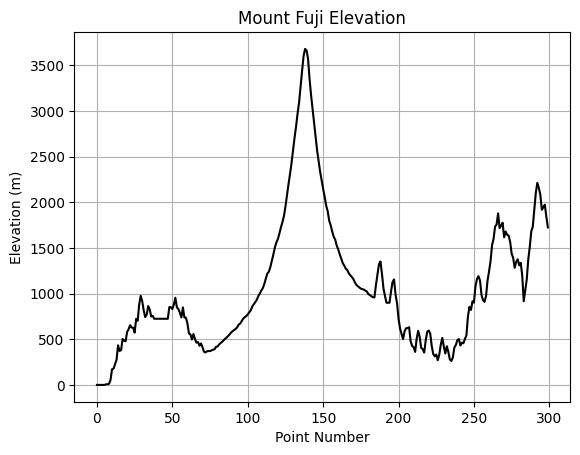

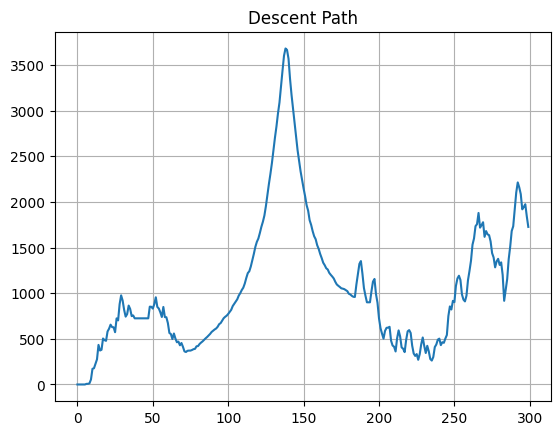

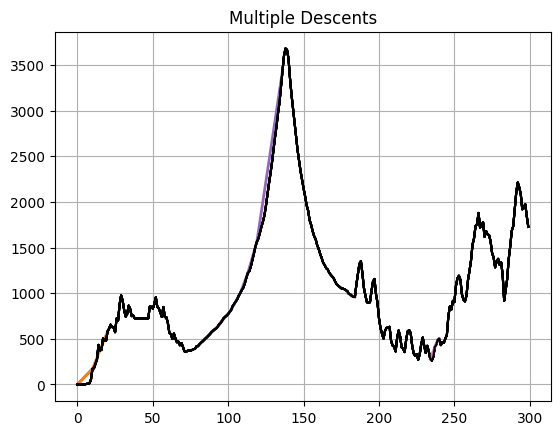

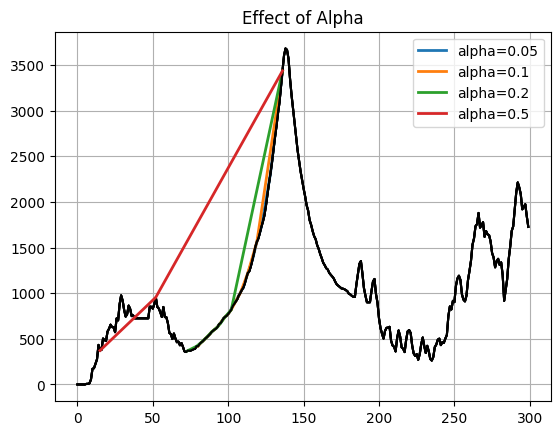

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fuji = np.loadtxt("mtfuji_data.csv", delimiter=",", skiprows=1)
points = fuji[:, 0].astype(int)
elevations = fuji[:, 3]
print(fuji[130:140])

def gradient(elevations, i):
    if i == 0:
     return 0
    else:
      return elevations[i] - elevations[i - 1]

def next_point(i, elevations, alpha):
    new_i = round(i - alpha * gradient(elevations, i))
    return max(0, min(len(elevations) - 1, new_i))

def descend(start, elevations, alpha):
    path = [start]
    while True:
        nxt = next_point(path[-1], elevations, alpha)
        if nxt == path[-1] or elevations[nxt] >= elevations[path[-1]]:
            break
        path.append(nxt)
    return path

plt.plot(points, elevations, color='black')
plt.title('Mount Fuji Elevation')
plt.xlabel('Point Number'); plt.ylabel('Elevation (m)')
plt.grid(); plt.show()


alpha = 0.1
path = descend(len(elevations)-1, elevations, alpha)
plt.plot(points, elevations)
plt.plot(path, elevations[path], linewidth=2)
plt.title('Descent Path'); plt.grid(); plt.show()


for start in [10, 20, 50, 100, 136, 180, 240, 280]:
    plt.plot(points, elevations, color='black')
    path = descend(start, elevations, alpha)
    plt.plot(path, elevations[path], linewidth=2)
plt.title('Multiple Descents'); plt.grid(); plt.show()


for a in [0.05, 0.1, 0.2, 0.5]:
    plt.plot(points, elevations, color='black')
    path = descend(136, elevations, a)
    plt.plot(path, elevations[path], linewidth=2, label=f'alpha={a}')
plt.legend(); plt.title('Effect of Alpha'); plt.grid(); plt.show()
